In [ ]:
import csv
from pathlib import Path 
import numpy as np
from keras.preprocessing.text import Tokenizer
from sklearn.utils import shuffle
from keras.preprocessing import sequence
import os 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, Reshape
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline


Using TensorFlow backend.


In [0]:
max_features = 20000
maxlen = 100

Ytrain=[]
trainx=[]
Ytest=[]
testx=[]
print("loading the data...")
with open('out5.csv',errors='ignore') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = '\t')
    for row in csv_reader:
        if csv_reader.line_num < 170001:
            Ytrain.append(int(row[0].split('/')[0]))
            trainx.append(row[1])
        elif csv_reader.line_num < 190001:
            Ytest.append(int(row[0].split('/')[0]))
            testx.append(row[1]) 
        else:
            break    

#194869


print("data loaded, processing data...")


# create the tokenizer
tok= Tokenizer(num_words=max_features, lower=True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',split=' ', char_level=False, oov_token=None, document_count=0)
# fit the tokenizer on the documents
tok.fit_on_texts(trainx)
# summarize what was learned
#print(train.word_counts)
#print(train.document_count)
#print(train.word_index)
#print(train.word_docs)
# integer encode documents
Xtrain = tok.texts_to_sequences(trainx)

Xtest = tok.texts_to_sequences(testx)




#Xtrain, y_train = shuffle(Xtrain, Ytrain, random_state=0)
#Xtest, y_test = shuffle(Xtest, Ytest, random_state=0)


# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Ytrain)
encoded_Ytrain = encoder.transform(Ytrain)
encoded_Ytest = encoder.transform(Ytest)
# convert integers to dummy variables (i.e. one hot encoded)
y_train = np_utils.to_categorical(encoded_Ytrain)
y_test = np_utils.to_categorical(encoded_Ytest)

encoder_length = len(y_train[0])
print("length of one hot enconding  ", encoder_length)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(Xtrain, maxlen=maxlen)
x_test = sequence.pad_sequences(Xtest, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

loading the data...
data loaded, processing data...


length of one hot enconding   10
Pad sequences (samples x time)
x_train shape: (169990, 100)
x_test shape: (20000, 100)


In [ ]:
# https://medium.com/datadriveninvestor/deep-learning-techniques-for-text-classification-9392ca9492c7

from keras.callbacks import EarlyStopping

embedding_size = 128
gru_node = 128
kernel_size = 2
filters = 128
pool_size = 2

model = Sequential()
model.add(Embedding(max_features,embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, recurrent_dropout=0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(encoder_length))
model.add(Activation('softmax'))   

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 1
batch_size = 64


history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 152991 samples, validate on 16999 samples
Epoch 1/3
152991/152991 [==============================] - 458s 3ms/step - loss: 1.7488 - accuracy: 0.3410 - val_loss: 1.7132 - val_accuracy: 0.3461
Epoch 2/3
152991/152991 [==============================] - 460s 3ms/step - loss: 1.5554 - accuracy: 0.3997 - val_loss: 1.6205 - val_accuracy: 0.3753
Epoch 3/3
20000/20000 [==============================] - 17s 870us/step
Test score: 1.591667025756836
Test accuracy: 0.383899986743927


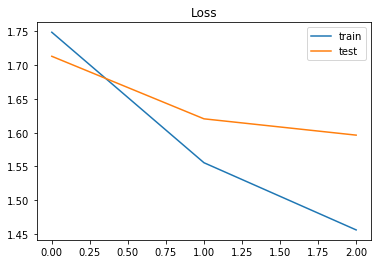

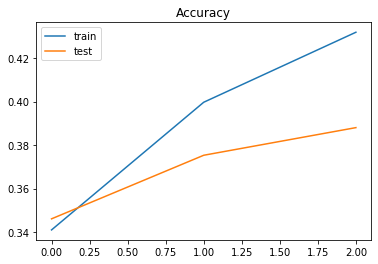

In [ ]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

plt.figure(1)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.figure(2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()





plt.show();



In [ ]:
# https://medium.com/datadriveninvestor/deep-learning-techniques-for-text-classification-9392ca9492c7

from keras.callbacks import EarlyStopping

embedding_size = 128
gru_node = 128
kernel_size = 2
filters = 128
pool_size = 2

model = Sequential()
model.add(Embedding(max_features,embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, recurrent_dropout=0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(encoder_length))
model.add(Activation('softmax'))   


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 3
batch_size = 64


history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])



score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


KeyboardInterrupt: 

In [ ]:
plt.figure(1)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.figure(2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()





plt.show();